# 1.1 Example polynomial curve Fitting

We have a dataset $d(\mathbf{x},\mathbf{t})$ with inputs $\mathbf{x}=\mathit{(x_1,x_2,...,x_3)^T}$ and observations $\mathbf{t}=\mathit{(t_1,t_2,...,t_3)^T}$. We want to find a relation between $\mathbf{x}$ and $\mathbf{t}$ to make predictions $\hat{y}$ of a new input variable $\hat{x}$.
We will take as example the a dataset sampled from a $sin(2\pi x)$ function adding some gaussian noise $v\sim\mathcal{N(\mu,\sigma^2)}$.

In [1683]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$sin(2\pi x)$ formula

In [1684]:
time = np.arange(0,1,0.01)
amplitude = np.sin(2*np.pi*time)

Sampling 10 values from $sin(2\pi x)$ with gaussian noise $v\sim\mathcal{N(0,0.01)}$.

In [1685]:
np.random.seed(353)
x_0 = np.random.choice(time, 10) #sample without noise
t = np.sin(2*np.pi*x_0)
v = np.random.randn(10)*np.sqrt(0.01) #random noise
t = t+v #noisy sample

Plotting sample

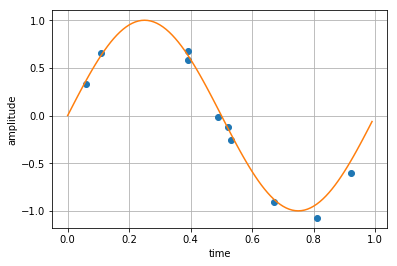

In [1686]:
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid(True, which='both')
plt.plot(x_0,t,'o')
plt.plot(time, amplitude)

We will find the curve using a trinomial (third degree polynomial) and solve it using gradient descent and sum of squares of errors (Residual sum of squares)

In [1687]:
def x_matrix_with_n_polyn(x, n_order=3):
    if n_order > 0:
        new_x = np.ones(x.shape[0])
        for i in range(1, n_order+1):
            new_x = np.vstack((new_x, x**i))
        return new_x
    else:
        print('The polynomial has to be of order n >= 1')

In [1688]:
x = x_matrix_with_n_polyn(x_0, n_order=3)
w = np.random.randn(x.shape[0])
print('random weights: ', w)


('random weights: ', array([ 0.18789667, -1.8557397 ,  0.53681757, -0.90609429]))


$y(x,\mathbf{w})=w_0+w_1x+w_2x^2+w_3x^3 = w^T\mathbf{x}$

In [1689]:
y = np.dot(w,x)
print('output with random weights: ', y)

('output with random weights: ', array([-0.01094522, -1.08699116, -0.77974992, -0.69912697, -1.44458214,
        0.07828911, -1.77058622, -0.75933661, -0.50794047, -0.50794047]))


$E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^N{(y(x_n,\mathbf{w})-t_n)^2}$

In [1690]:
E = 0.5*np.sum((y-t)**2)
print('error with random weights: ', E)

('error with random weights: ', 2.897198885848854)


$\frac{\nabla E(\mathbf{w})}{ \mathbf{w}} = \sum_{n=1}^N{((y(x_n,\mathbf{w})-t_n)*x_i)} = \mathbf{x}(\mathbf{y-t})$

In [1691]:
y = np.dot(w,x)
d_w = np.dot(x,(y-t))
w = w -0.1*d_w
print('gradient of weights: ', w)

('gradient of weights: ', array([ 0.86420479, -1.51403764,  0.75210629, -0.75146751]))


$\mathbf{w} \leftarrow \mathbf{w}-\frac{\nabla E(\mathbf{w})}{ \mathbf{w}}$

In [1692]:
class GradientDescentLinearRegression:
    def __init__(self, alpha=0.01, iterations=1000):
        self.alpha, self.iterations = alpha, iterations

    def fit(self, x, t, show_error=False):
        #w = np.random.randn(x.shape[0])
        w = np.linalg.lstsq(x.T, t)[0] #cheatting: getting weights closer to solution because gradient descent cannot solve this non convex problem
        for i in range(self.iterations):
            y = np.dot(w,x)
            res = (y-t)
            d_w = np.dot(x, res)
            w = w - self.alpha*d_w
            if i%100==0 and show_error:
                E = 0.5*np.sum((res)**2)
                print('error at iter. {}: {}'.format(i, E))
        self.w = w
        E = 0.5*np.sum((res)**2)
        print('final error: ', E)
    def predict(self, x):
        return np.dot(self.w, x)


In [1693]:
linear_reg = GradientDescentLinearRegression()

In [1694]:
# np.random.seed(0)
linear_reg.fit(x,t)

('final error: ', 0.008305812528065231)


/home/hanz/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


In [1695]:
y_hat = linear_reg.predict(x)

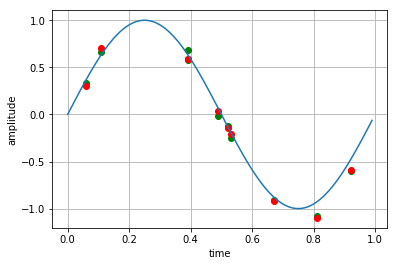

In [1696]:
plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid(True, which='both')
plt.plot(x_0,t,'o',  color='green')
plt.plot(x_0,y_hat,'o', color='red')
plt.plot(time, amplitude)

You can test and see the polynomials with different n order

('final error: ', 0.002411476785168774)


/home/hanz/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


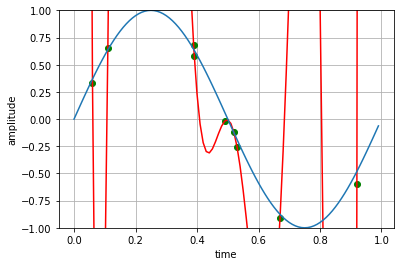

In [1697]:
n_order=10
x = x_matrix_with_n_polyn(x_0, n_order)
linear_reg.fit(x,t)
xx = x_matrix_with_n_polyn(time, n_order)
yy = linear_reg.predict(xx)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.ylim([-1,1])
plt.grid(True, which='both')
plt.plot(x_0,t,'o',  color='green')
plt.plot(time,yy, color='red')
plt.plot(time, amplitude)